In [9]:
import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
from pathlib import Path


import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")


# Set figure parameters
fig_width = 3.25 #ECS spec is 3.25" width
fig_width_2col_inches = 7
fig_width_3col_inches = 10
fig_height = (3/4)*fig_width # standard ratio

rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 7
rcParams['legend.frameon'] = False
rcParams['xtick.bottom'] = False
rcParams['ytick.direction'] = 'in' 



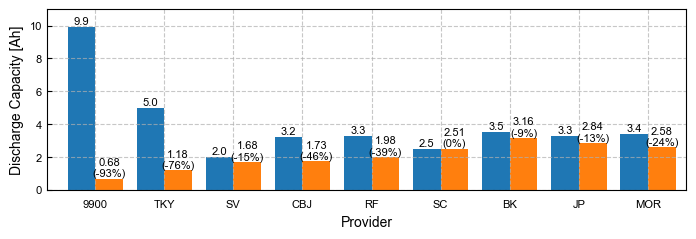

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 현재 작업 중인 디렉토리 경로 가져오기
current_dir = os.getcwd()

# 'Electrochemistry' 폴더 경로 설정
electrochemistry_dir = os.path.join(current_dir, 'Electrochemistry')

# 'Electrochemistry' 폴더 내의 모든 .xlsx 파일을 찾기
file_names = [f for f in os.listdir(electrochemistry_dir) if f.endswith('.xlsx')]
file_names = sorted([f for f in os.listdir(electrochemistry_dir) if f.endswith('.xlsx')])

# Hardcoded values
hardcoded_values = [9.9, 5.0, 2.0, 3.2, 3.3, 2.5, 3.5, 3.3, 3.4]

# List to store the extracted values
extracted_values = []

# Iterate through the files in the specified order
for file_name in file_names:
    file_path = os.path.join(electrochemistry_dir, file_name)
    df = pd.read_excel(file_path, sheet_name='cycle')
    # Filter the rows with Cycle Index 1
    cycle_index_1 = df[df['Cycle Index'] == 1]
    # Extract the DChg. Cap. (Ah) value
    dchg_cap = cycle_index_1['DChg. Cap.(Ah)'].values[0]
    extracted_values.append(dchg_cap)

# Create the bar graph
labels = [os.path.splitext(file_name)[0] for file_name in file_names]  # Use file names as labels
labels = ['9900','TKY','SV','CBJ','RF','SC','BK','JP','MOR']  # Use file names as labels
x = range(len(labels))

fig, ax = plt.subplots(figsize=(fig_width_2col_inches, fig_height))  # Adjust the figsize as necessary

# Plotting the bars
bar_width = 0.4
ax.bar(x, hardcoded_values, width=bar_width, label='Hardcoded Values', align='center')
ax.bar([p + bar_width for p in x], extracted_values, width=bar_width, label='Extracted Values', align='center')

# Adding labels and title
ax.set_ylabel('Discharge Capacity [Ah]', fontsize=10)
ax.set_xlabel('Provider', fontsize=10)
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels, ha='center')

ax.set_ylim(0, 11)
ax.set_xlim(-0.5, 8.75)
# 그리드 켜기
ax.grid(True, linestyle='--', alpha=0.7)

# Adding percentage differences above the bars
for i in range(len(labels)):
    difference = int(((extracted_values[i] - hardcoded_values[i]) / hardcoded_values[i]) * 100)  # 퍼센트를 정수로 변환
    ax.text(i, hardcoded_values[i] + 0.05, f'{hardcoded_values[i]}', ha='center', va='bottom')
    ax.text(i + bar_width, extracted_values[i] + 0.7, f'{extracted_values[i]:.2f}', ha='center', va='bottom')
    ax.text(i + bar_width, extracted_values[i] + 0.6, f'({difference}%)', ha='center', va='top')

# ax.legend()

plt.tight_layout()
plt.show()

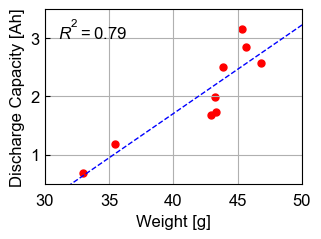

In [65]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# 현재 작업 중인 디렉토리 경로 가져오기
current_dir = os.getcwd()

# 'Electrochemistry' 폴더 경로 설정
electrochemistry_dir = os.path.join(current_dir, 'Electrochemistry')

# 'Electrochemistry' 폴더 내의 모든 .xlsx 파일을 찾기
file_names = sorted([f for f in os.listdir(electrochemistry_dir) if f.endswith('.xlsx')])

# Weight values
weight = [32.9975, 35.5, 42.9025, 43.36, 43.24, 43.9, 45.385, 45.62, 46.8]

# List to store the extracted values
extracted_values = []

# Iterate through the files in the specified order
for file_name in file_names:
    file_path = os.path.join(electrochemistry_dir, file_name)
    df = pd.read_excel(file_path, sheet_name='cycle')
    # Filter the rows with Cycle Index 1
    cycle_index_1 = df[df['Cycle Index'] == 1]
    # Extract the DChg. Cap. (Ah) value
    dchg_cap = cycle_index_1['DChg. Cap.(Ah)'].values[0]
    extracted_values.append(dchg_cap)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(weight, extracted_values)

# Extend the weight range for the regression line
weight_min = min(weight) - 5  # Extend below the minimum weight
weight_max = max(weight) + 5  # Extend above the maximum weight
extended_weight = np.linspace(weight_min, weight_max, 100)

# Calculate the regression line for the extended weight range
regression_line = extended_weight * slope + intercept

# Scatter plot

fig, ax = plt.subplots(figsize=(fig_width, fig_height))  # Adjust the figsize as necessary

ax.scatter(weight, extracted_values, color='red', label='Extracted Values')
ax.plot(extended_weight, regression_line, color='blue', linestyle='--', label=f'Linear Fit: $R^2$ = {r_value**2:.2f}')
r_squared = r_value ** 2
ax.text(0.05, 0.95, r'$R^{2} = %.2f$' % r_squared, transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Adding labels and title
ax.set_xlabel('Weight [g]',fontsize=12)
ax.set_ylabel('Discharge Capacity [Ah]',fontsize=12)
ax.set_xlim(30,50)
ax.set_ylim(0.5,3.5)
ax.tick_params(axis='both', which='major', labelsize=12) 
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()


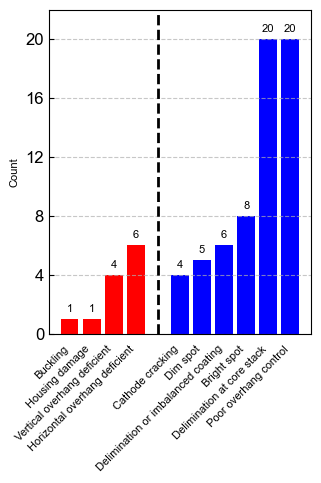

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
# 데이터
# categories = ["Buckling", "Housing\ndamage", "Vertical\noverhang\ndeficient", 
#               "Horizontal\noverhang\ndeficient", "Cathode\ncracking", "Dim spot", 
#               "Delimination\nor imbalanced\ncoating", "Bright spot", 
#               "Delimination\nat core stack", "Poor\noverhang\ncontrol"]
categories = ["Buckling", "Housing damage", "Vertical overhang deficient", 
              "Horizontal overhang deficient", "Cathode cracking", "Dim spot", 
              "Delimination or imbalanced coating", "Bright spot", 
              "Delimination at core stack", "Poor overhang control"]

values = [1, 1, 4, 6, 4, 5, 6, 8, 20, 20]

# x 위치 조정 (간격 추가)
x1 = np.arange(len(categories[:4]))
x2 = np.arange(len(categories[4:])) + len(x1) + 1  # 빨간 막대 뒤에 간격 추가

# 막대그래프 그리기
fig, ax = plt.subplots(figsize=(fig_width, fig_height*2))

# 빨간색 막대 (Horizontal overhang deficient 까지)
ax.bar(x1, values[:4], color='red', label='Group 1')

# 파란색 막대 (Cathode cracking 이후)
ax.bar(x2, values[4:], color='blue', label='Group 2')

# 구분선 그리기 (점선, 두께를 2로 설정)
ax.axvline(x=len(x1), color='black', linestyle='--', linewidth=2)

# 레이블 및 제목 추가
ax.set_ylabel('Count')

# x축 레이블 설정 (각 x위치에 대응하는 카테고리명)
x_labels = np.concatenate((x1, x2))
ax.set_xticks(x_labels)
ax.set_ylim(0,22)
ax.tick_params(axis='y', which='major', labelsize=12) 
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MultipleLocator(4))
ax.set_xticklabels(categories, rotation=45, ha='right')

# y축만 그리드 표시
ax.grid(True, axis='y', linestyle='--', alpha=0.7)


# 값 표시
for i, v in enumerate(values):
    if i < len(x1):
        ax.text(x1[i], v + 0.5, str(v), color='black', ha='center')
    else:
        ax.text(x2[i - len(x1)], v + 0.5, str(v), color='black', ha='center')

plt.tight_layout()
plt.show()